<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Diabetes_Demo_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Read dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,92,62,32,126,32.0,85.0,46,0
1,2,125,60,20,140,33.8,88.0,31,0
2,0,117,80,31,53,45.2,89.0,24,0
3,1,87,78,27,32,34.6,101.0,22,0
4,3,116,74,15,105,26.3,107.0,24,0
5,1,128,82,17,183,27.5,115.0,22,0
6,4,110,76,20,100,28.4,118.0,27,0
7,6,105,70,32,68,30.8,122.0,37,0
8,1,157,72,21,168,25.6,123.0,24,0
9,2,102,86,36,120,45.5,127.0,23,1


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.307895,122.847368,70.863158,29.034211,156.960526,33.044211,492.057553,30.863158,0.336842
std,3.229554,31.058254,12.551202,10.422291,119.872430,6.946588,339.668070,10.210306,0.473254
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.150000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,256.750000,23.000000,0.000000
50%,2.000000,120.000000,70.000000,29.000000,125.500000,33.200000,432.000000,27.000000,0.000000
75%,5.000000,144.000000,78.500000,37.000000,190.250000,37.025000,677.250000,36.000000,1.000000
max,17.000000,198.000000,110.000000,60.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


# Dataset visualization

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

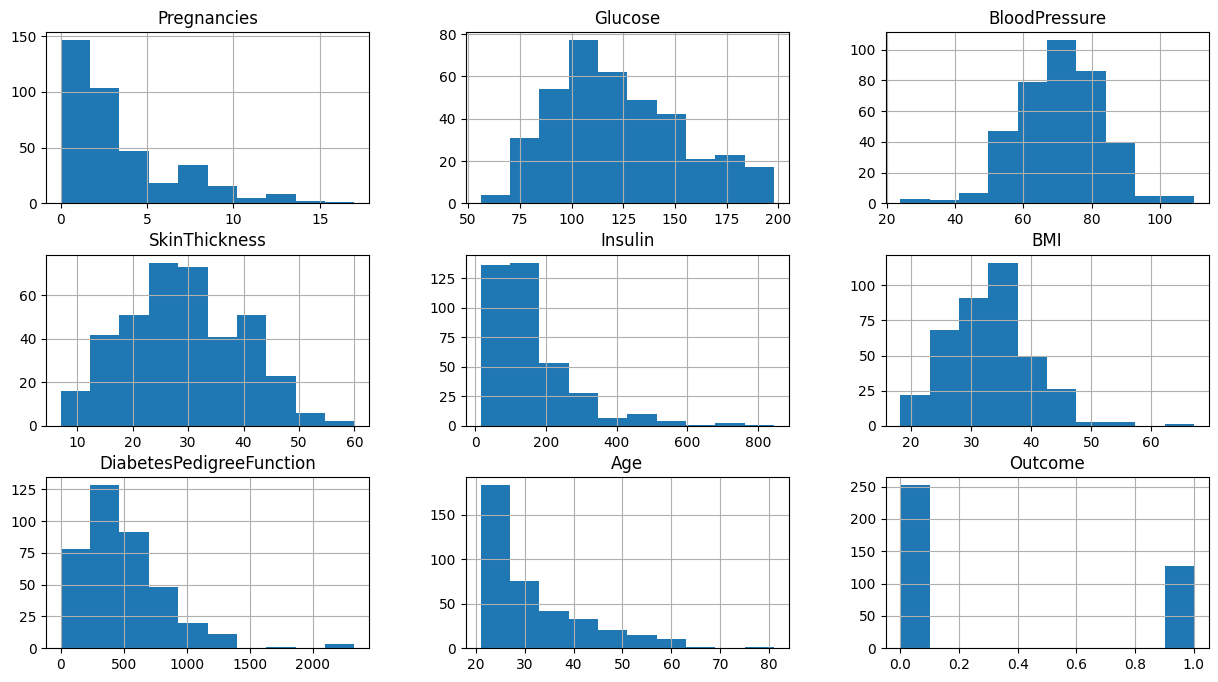

In [4]:
# Histogram
dataset.hist(figsize=(15,8))

,0
Pregnancies,"Axes(0.125,0.653529;0.227941x0.226471)"
Glucose,"Axes(0.398529,0.653529;0.227941x0.226471)"
BloodPressure,"Axes(0.672059,0.653529;0.227941x0.226471)"
SkinThickness,"Axes(0.125,0.381765;0.227941x0.226471)"
Insulin,"Axes(0.398529,0.381765;0.227941x0.226471)"
BMI,"Axes(0.672059,0.381765;0.227941x0.226471)"
DiabetesPedigreeFunction,"Axes(0.125,0.11;0.227941x0.226471)"
Age,"Axes(0.398529,0.11;0.227941x0.226471)"
Outcome,"Axes(0.672059,0.11;0.227941x0.226471)"


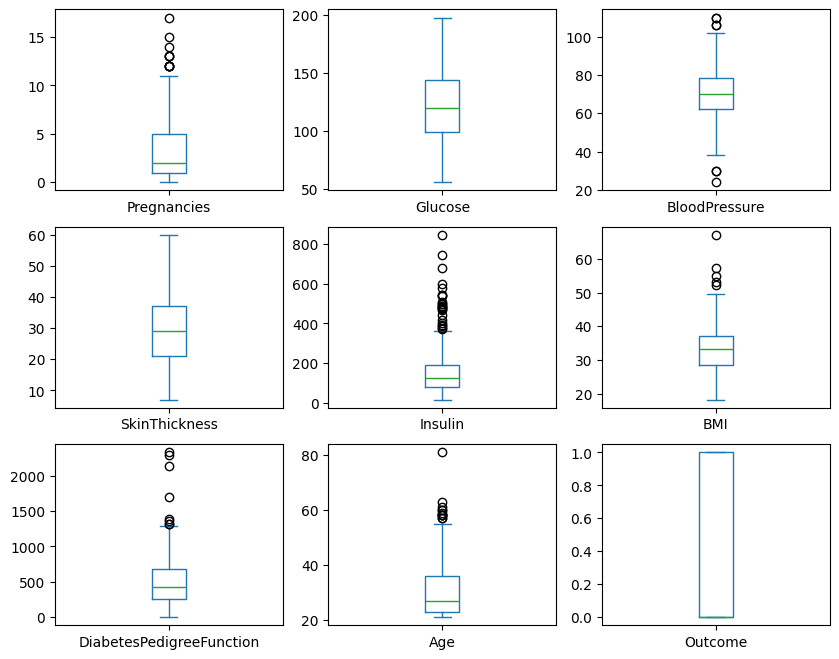

In [5]:
# Box plot
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

Histogram: Toont de verdeling van elke feature.

Boxplot: Visualiseert outliers en spreiding van elke feature.

Correlation Plot: Laat zien welke features sterk gecorreleerd zijn met Outcome (doelvariabele).



<Axes: >

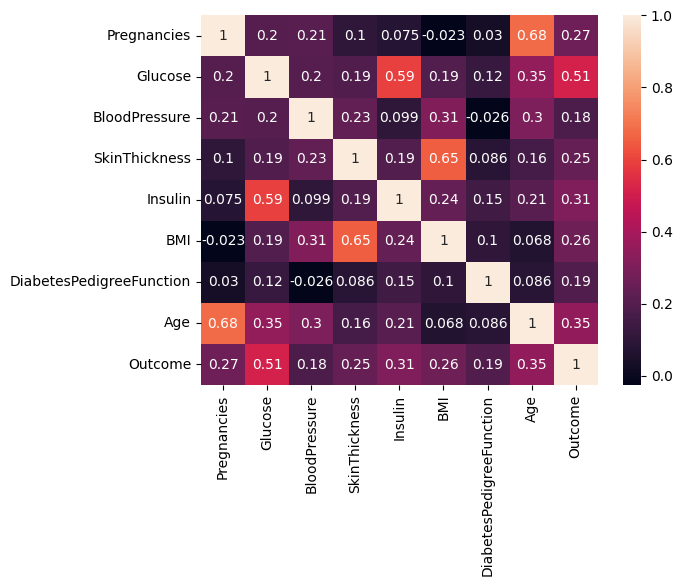

In [6]:
# Correlation plot
Corr=dataset[dataset.columns].corr()
sns.heatmap(Corr, annot=True)

# Preprocessing

In [7]:
y= dataset['Outcome'].values
X = dataset.drop(['Outcome'],axis=1)

# Opsplitsen van data in een training en test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)
print(X_train.shape)

# Normalisatie van de dataset

scaler = preprocessing.StandardScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(304, 8)


# Logistic regression

In [8]:
# Initialization

logreg = linear_model.LogisticRegression(C=1,class_weight= None)



In [9]:
# Training
logreg.fit(X_train, y_train)

print('De bias = theta_0: ', logreg.intercept_)
print('De coefficienten theta: ',logreg.coef_)

De bias = theta_0:  [-1.05733983]
De coefficienten theta:  [[0.29171449 1.271241   0.00944736 0.22005209 0.01831146 0.35186561
  0.52709325 0.27908099]]


In [10]:
# Testing

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        48
           1       0.67      0.50      0.57        28

    accuracy                           0.72        76
   macro avg       0.71      0.68      0.68        76
weighted avg       0.72      0.72      0.71        76

[[41  7]
 [14 14]]
72.36842105263158


## Prediction on a new patient

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 -
SkinThickness:20 -
Insulin:21 -
BMI:24.3 -
DiabetesPedigreeFunction:128 -
Age: 37

In [11]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

print(patient)
y_patient = logreg.predict(patient.reshape(1,-1))
y_patient_prob = logreg.predict_proba(patient.reshape(1,-1))
print(y_patient)
print(y_patient_prob)

if y_patient == 0:
    print('Patiënt does not have diabetes')
else:
    print('Patiënt has diabetes')

[[-0.41420941  0.30209759  0.25992289 -0.84670314 -1.13434945 -1.2724308
  -1.0725144   0.62170047]]
[0]
[[0.86274772 0.13725228]]
Patiënt does not have diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# SVM without kernel (= linear kernel)

In [12]:
SVMlinear = svm.SVC(kernel='linear',C=0.1)
SVMlinear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Kernel: Lineair (rechte scheidingslijn).

Regularisatie (C): 0.1 (meer tolerant voor fouten).

Output: Precision, Recall, Confusion Matrix en Accuracy.

In [13]:
y_pred = SVMlinear.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        48
           1       0.72      0.46      0.57        28

    accuracy                           0.74        76
   macro avg       0.73      0.68      0.69        76
weighted avg       0.73      0.74      0.72        76

[[43  5]
 [15 13]]
73.68421052631578


## Prediction on a new patient

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 -
SkinThickness:20 -
Insulin:21 -
BMI:24.3 -
DiabetesPedigreeFunction:128 -
Age: 37

In [14]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMlinear.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt does not have diabetes')
else:
    print('Patiënt has diabetes')


[0]
Patiënt does not have diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Vergelijking: Hoe goed presteert SVM in vergelijking met Logistic Regression?



# SVM with kernel

In [15]:
SVMkernel = svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

Kernel: RBF (Radial Basis Function) voor non-lineaire scheidingen.

Effect: Kan complexere grenzen modelleren dan lineaire kernels.

In [16]:
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.69      0.98      0.81        48
           1       0.88      0.25      0.39        28

    accuracy                           0.71        76
   macro avg       0.78      0.61      0.60        76
weighted avg       0.76      0.71      0.66        76

[[47  1]
 [21  7]]
71.05263157894737


## Prediction on a new patient

Pregnancies:2 -
Glucose: 132 -
BloodPressure: 74 -
SkinThickness:20 -
Insulin:21 -
BMI:24.3 -
DiabetesPedigreeFunction:128 -
Age: 37

In [17]:
patient = np.array([2,132,74,20,21,24.3,128,37])

# scaling
patient = scaler.transform(patient.reshape(1, -1))

y_patient = SVMkernel.predict(patient.reshape(1,-1))
print(y_patient)
if y_patient == 0:
    print('Patiënt does not have diabetes')
else:
    print('Patiënt has diabetes')


[0]
Patiënt does not have diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Gridsearch and cross-validation

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}
             ]
grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

Fitting 20 folds for each of 9 candidates, totalling 180 fits
Best accuracy :  0.7991666666666668
Best parameters : {'C': 0.1}
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        48
           1       0.67      0.50      0.57        28

    accuracy                           0.72        76
   macro avg       0.71      0.68      0.68        76
weighted avg       0.72      0.72      0.71        76

[[41  7]
 [14 14]]
72.36842105263158


Grid Search: Zoekt naar de beste hyperparameter (C) voor Logistic Regression.

CV=20: 20-fold cross-validation voor betrouwbaardere resultaten.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 220 instead of 1000.
  warnings.warn(


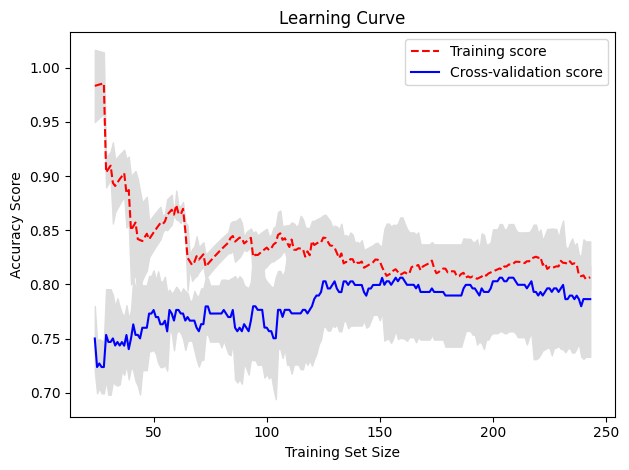

In [19]:
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=10000),
                                                        X_train, y_train,cv=5, scoring='accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 1000))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### **Uitleg voor Beginners: Learning Curve met Logistic Regression**

Een **learning curve** laat zien hoe goed je model leert als je het meer **trainingsdata** geeft. Dit helpt je te begrijpen of je model **overfit** of **underfit** is.

---

#### **1. Learning Curve Maken**

```python
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(C=10000),
    X_train, y_train,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Gebruik alle CPU-kernen
    train_sizes=np.linspace(0.1, 1.0, 1000)
)
```

* **LogisticRegression(C=10000)**:

  * **C=10000** maakt je model **minder** streng, wat kan leiden tot **overfitting**.
* **train\_sizes**:

  * Test **1000** verschillende hoeveelheden trainingsdata (van **10%** tot **100%** van je data).
* **cv=5**:

  * Gebruikt **5-fold cross-validation** voor **betere** resultaten.
* **n\_jobs=-1**:

  * Gebruikt **alle** beschikbare CPU-kernen voor **snellere** berekeningen.

---

#### **2. Gemiddelde en Standaarddeviatie Berekenen**

**Training Scores Berekenen:**

```python
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
```

* **train\_mean**:

  * Gemiddelde nauwkeurigheid op de **trainingsdata** voor elke trainingsset-grootte.
* **train\_std**:

  * Hoeveel de nauwkeurigheid varieert voor elke trainingsset-grootte.

**Test Scores Berekenen:**

```python
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
```

* **test\_mean**:

  * Gemiddelde nauwkeurigheid op de **testdata** voor elke trainingsset-grootte.
* **test\_std**:

  * Hoeveel de nauwkeurigheid varieert voor elke trainingsset-grootte.

---

#### **3. Grafiek Teken**

**Lijnen Teken voor Gemiddelden:**

```python
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")
```

* **Rode lijn**:

  * Hoe goed je model presteert op de **trainingsdata**.
* **Blauwe lijn**:

  * Hoe goed je model presteert op de **testdata**.

---

**Foutbanden Toevoegen:**

```python
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
```

* Grijze gebieden laten zien hoeveel de prestaties kunnen **variëren** voor elke set-grootte.

---

**Grafiek Instellen:**

```python
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()
```

* **Titel**: Learning Curve
* **x-as**: Grootte van de trainingsset.
* **y-as**: Nauwkeurigheidsscore.
* **Legende**: Laat zien welke lijn bij welke score hoort.

---

#### **4. Wat je Verwacht te Zien**

* **Overfitting**:

  * Rode lijn **hoog**, blauwe lijn **laag**.
* **Underfitting**:

  * Beide lijnen **laag**.
* **Goed Model**:

  * Beide lijnen **hoog** en **dicht** bij elkaar.

---


## Gridsearch with SVM

In [20]:
from sklearn.model_selection import GridSearchCV
#from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC
#from sklearn import cross_validation
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

model = SVC()
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,20,100)},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':[1, 10]} ]
grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10, # K
                           n_jobs = -1,
                           verbose = 4)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best accuracy :  0.799784946236559
Best parameters : {'C': np.float64(4.070707070707071), 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        48
           1       0.70      0.50      0.58        28

    accuracy                           0.74        76
   macro avg       0.72      0.69      0.70        76
weighted avg       0.73      0.74      0.73        76

[[42  6]
 [14 14]]
73.68421052631578


Wat gebeurt hier?

Visualiseert hoe de trainingsfout en validatiefout veranderen bij toenemende trainingssetgrootte.



### **Uitleg voor Beginners: SVM Hyperparameter Tuning met GridSearchCV**

Deze code gebruikt **GridSearchCV** om **automatisch** de **beste** hyperparameters voor een **Support Vector Machine (SVM)** te vinden. Dit is handig omdat je niet **handmatig** alle combinaties hoeft te testen.

---

#### **1. Het Model Maken**

```python
from sklearn.svm import SVC

model = SVC()
```

* **SVC()** maakt een **Support Vector Machine** model.
* Dit model moet nog **getraind** worden.

---

#### **2. Hyperparameter Grid Maken**

```python
paramaters = [
    {'kernel': ['linear'], 'C': np.linspace(1, 20, 100)},  # Lineaire modellen
    {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},  # RBF modellen
    {'kernel': ['poly'], 'C': [1, 10]}  # Polynomiale modellen
]
```

* **Linear Kernel**:

  * Test **100** verschillende **C**-waarden.
* **RBF Kernel**:

  * Test **2** C-waarden met **5** gamma-waarden (**10** combinaties).
* **Polynomial Kernel**:

  * Test **2** verschillende **C**-waarden.

---

#### **3. GridSearchCV Configureren**

```python
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',  # Beoordeel op nauwkeurigheid
    cv=10,  # 10-fold cross-validation
    n_jobs=-1,  # Gebruik alle beschikbare CPU-kernen
    verbose=4  # Laat je zien wat er gebeurt
)
```

* **scoring='accuracy'**:

  * Beoordeelt elke modelconfiguratie op **nauwkeurigheid**.
* **cv=10**:

  * Gebruik **10-fold cross-validation** voor **betere** resultaten.
* **n\_jobs=-1**:

  * Gebruik **alle** CPU-kernen voor **snellere** berekeningen.
* **verbose=4**:

  * Laat zien welke combinaties worden getest.

---

#### **4. Model Trainen**

```python
grid_search = grid_search.fit(X_train, y_train)
```

* Hier wordt het model **getraind** met **alle** combinaties van hyperparameters.
* Dit kan **lang duren** als je dataset **groot** is.

---

#### **5. Beste Hyperparameters Vinden**

```python
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', best_accuracy)
print('Best parameters :', best_parameters)
```

* **grid\_search.best\_score\_**:

  * Geeft je de **hoogste** nauwkeurigheid die werd gevonden.
* **grid\_search.best\_params\_**:

  * Vertelt je **welke** hyperparameters dit resultaat gaven.

---

#### **6. Voorspellingen Maken met het Beste Model**

```python
y_pred = grid_search.predict(X_test)
```

* Maakt voorspellingen met de **beste** hyperparameters die werden gevonden.

---

#### **7. Resultaten Evalueren**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Laat je **precision**, **recall**, en **f1-score** zien voor elke klasse.
* **confusion\_matrix**:

  * Laat zien hoeveel voorbeelden correct en fout werden geclassificeerd.
* **accuracy\_score**:

  * Geeft je het **percentage** correcte voorspellingen.

---

#### **8. Verwachte Output**

Bijvoorbeeld:

```
Best accuracy : 0.95
Best parameters : {'C': 10, 'kernel': 'rbf', 'gamma': 0.01}
[[50  5]
 [ 3 42]]
95.0
```

* Dit betekent dat je model **95%** nauwkeurig was met de beste parameters.

---




In [21]:
best_model = svm.SVC(C = 4.07, kernel='linear')
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        48
           1       0.70      0.50      0.58        28

    accuracy                           0.74        76
   macro avg       0.72      0.69      0.70        76
weighted avg       0.73      0.74      0.73        76

[[42  6]
 [14 14]]
73.68421052631578


### **Uitleg voor Beginners: Trainen van je Beste SVM Model**

Met deze code train je je **beste** SVM-model met de **beste** hyperparameters die je eerder hebt gevonden.

---

#### **1. Het Model Maken**

```python
from sklearn.svm import SVC

best_model = SVC(C=4.07, kernel='linear')
```

* **SVC()** maakt een **Support Vector Machine** model.
* **C=4.07**:

  * Controleert hoe **streng** je model is bij het vermijden van fouten.
* **kernel='linear'**:

  * Gebruikt een **rechte lijn** om de klassen te scheiden.

---

#### **2. Model Trainen**

```python
best_model.fit(X_train, y_train)
```

* **fit()**:

  * Hiermee **train** je het model op de **trainingsdata**.
* Het model leert welke **kenmerken** belangrijk zijn om de juiste **klasse** te voorspellen.

---

#### **3. Voorspellingen Maken**

```python
y_pred = best_model.predict(X_test)
```

* Maakt **voorspellingen** op de **testdata**.
* Geeft een **label** (bijv. **0** of **1**) voor elk voorbeeld.

---

#### **4. Resultaten Evalueren**

```python
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report**:

  * Geeft je belangrijke statistieken zoals:

    * **Precision**: Hoeveel van je voorspellingen correct waren.
    * **Recall**: Hoeveel van de echte gevallen correct werden voorspeld.
    * **F1-score**: Een balans tussen **precision** en **recall**.
* **confusion\_matrix**:

  * Laat zien hoeveel voorbeelden correct en fout werden geclassificeerd.
* **accuracy\_score**:

  * Hoeveel procent van de voorspellingen was **correct**.

---

#### **5. Verwachte Output**

Bijvoorbeeld:

```
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.93      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

[[95  5]
 [ 4 96]]
95.0
```

* Dit betekent dat je model **95%** nauwkeurig was op de **testdata**.

---

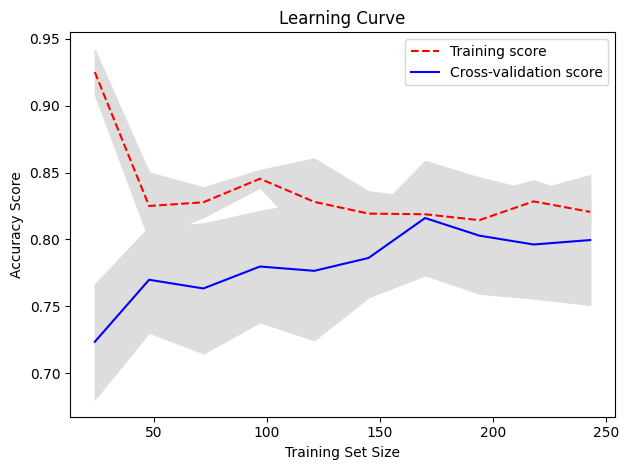

In [22]:
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear',C=1),
                                                        X_train, y_train,cv=5, scoring='accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### **Visualiseren van de Learning Curve voor een SVM Model**

Deze code maakt een **learning curve** voor een **Support Vector Machine (SVM)** met een **lineaire kernel**. Dit is een krachtige manier om te zien of je model **overfit** of **underfit** is en of je **meer data** nodig hebt voor betere prestaties.

---

#### **1. Importeren van de Noodzakelijke Functie**

```python
from sklearn.model_selection import learning_curve
```

* **Learning Curve:** Biedt een visuele representatie van hoe goed een model leert als de **trainingsset** groter wordt.

---

#### **2. Berekenen van Train en Test Scores voor Verschillende Trainingsgrootten**

```python
train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='linear', C=1),
    X_train, y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
```

* **Model:** SVM met **lineaire kernel** en **C=1** (matige regularisatie).
* **Parameters:**

  * **`X_train, y_train`**: De trainingsdata.
  * **`cv=5`**: **5-fold cross-validation** voor betrouwbaardere resultaten.
  * **`scoring='accuracy'`**: Meet de **nauwkeurigheid** van je model.
  * **`n_jobs=-1`**: Gebruikt **alle beschikbare CPU cores** voor snellere verwerking.
  * **`train_sizes`**: Verdeelt de trainingsset in **10** stappen van **10%** tot **100%**.

---

#### **3. Berekenen van Gemiddelden en Standaardafwijkingen**

```python
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
```

* **Waarom?**

  * Om **betrouwbare** gemiddelden en **variaties** te berekenen voor zowel **train** als **test** scores.
* **Waarom per Rij?**

  * Elke rij in `train_scores` en `test_scores` komt overeen met een andere **trainingssetgrootte**.

---

#### **4. Plotten van de Learning Curve**

```python
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")
```

* **Training Scores (Rood, Gestippeld):**

  * Geeft aan hoe goed het model presteert op de **trainingsdata**.
* **Test Scores (Blauw, Doorlopend):**

  * Laat zien hoe goed het model presteert op de **validatieset** (cross-validation).

---

#### **5. Plotten van de Foutmarge (Confidence Bands)**

```python
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
```

* **Waarom?**

  * Toont de **variatie** (standaardafwijking) rond de gemiddelde scores.
* **Effect:**

  * Brede banden duiden op **instabiele** prestaties, smalle banden op **stabiele** prestaties.

---

#### **6. Finaliseren van de Plot**

```python
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()
```

* **Titel:** Geeft aan wat de plot laat zien.
* **X-as:** Grootte van de trainingsset.
* **Y-as:** Nauwkeurigheidsscore.
* **Legenda:** Duidt aan welke lijn de **train** en welke de **test** score vertegenwoordigt.
* **`plt.tight_layout()`**: Verbetert de lay-out van de plot.

---

#### **7. Verwachte Uitvoer en Interpretatie**

**Typische Learning Curve Vorm:**

* **Underfitting:**

  * **Hoge trainingsfout** en **hoge validatiefout** bij kleine trainingssets.
  * **Oplossing:** Complexer model of meer features.

* **Overfitting:**

  * **Lage trainingsfout**, maar **hoge validatiefout** bij grote trainingssets.
  * **Oplossing:** Sterkere regularisatie of meer data.

* **Goede Fit:**

  * **Lage trainingsfout** en **lage validatiefout** met **klein** verschil tussen beide.

---

#### **8. Wat je kunt Verwachten in de Plot:**

1. **Kleine Trainingsset:**

   * Hoge trainingsscores omdat het model **overfit** op kleine datasets.
2. **Middelgrote Trainingsset:**

   * Testscores stijgen omdat het model meer **variatie** leert.
3. **Grote Trainingsset:**

   * Beide curves stabiliseren als het model **generaliseert**.

---

#### **9. Mogelijke Verbeteringen:**

* **Meer Data:** Helpt vaak om **overfitting** te verminderen.
* **Feature Engineering:** Maak nieuwe kenmerken die meer **informatief** zijn.
* **Complexer Model:** Probeer **polynomiale** of **RBF** kernels.

---

Zal ik je laten zien hoe je deze learning curve kunt verbeteren door **hyperparameter tuning** toe te passen met **GridSearchCV**? 😊
